In [151]:
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/melb-housing-data'

In [63]:


main_file_path = 'data/melb-housing-data/Melbourne_housing_FULL.csv'
data = pd.read_csv(main_file_path)

# save filepath to variable for easier access
melb_file_path = main_file_path
# read the data and store data in DataFrame titled melbourne_data
melb_data = pd.read_csv(melb_file_path) 
# print a summary of the data in Melbourne data
print(melb_data.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  31420.000000  2.458900e+04  31419.000000  31419.000000  24211.000000   
mean       3.019764  1.048342e+06     11.046431   3115.052962      3.051588   
std        0.974266  6.415156e+05      6.696776    107.223963      0.990758   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3049.000000      2.000000   
50%        3.000000  8.700000e+05     10.200000   3103.000000      3.000000   
75%        4.000000  1.292000e+06     13.900000   3155.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  24205.000000  23821.000000   20621.000000  12569.000000  14294.000000   
mean       1.610576      1.703455     588.068377    158.426641   1965.319015   
std        0.723262      1.002708    3525.370243

**List of imp inbilt functions and features**

    ??DataFrameSummary
    ??add_datepart
    ??proc_df
    --df.to_feather(f'{PATH}df')
    --emb_szs
    --get_elapsed


In [64]:
melb_data.describe()
DataFrameSummary(melb_data).summary()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,NaN,NaN,31420,NaN,24589,NaN,NaN,NaN,31419,31419,...,24205,23821,20621,12569,14294,NaN,24434,24434,NaN,31417
mean,NaN,NaN,3.01976,NaN,1.04834e+06,NaN,NaN,NaN,11.0464,3115.05,...,1.61058,1.70345,588.068,158.427,1965.32,NaN,-37.8115,145.002,NaN,7563.84
std,NaN,NaN,0.974266,NaN,641516,NaN,NaN,NaN,6.69678,107.224,...,0.723262,1.00271,3525.37,415.301,37.2966,NaN,0.0884601,0.117798,NaN,4433.62
min,NaN,NaN,1,NaN,85000,NaN,NaN,NaN,0,3000,...,0,0,0,0,1196,NaN,-38.1856,144.424,NaN,83
25%,NaN,NaN,2,NaN,635000,NaN,NaN,NaN,6.4,3049,...,1,1,208,100,1940,NaN,-37.8624,144.935,NaN,4385
50%,NaN,NaN,3,NaN,870000,NaN,NaN,NaN,10.2,3103,...,2,2,501,134,1970,NaN,-37.8082,145.007,NaN,6763
75%,NaN,NaN,4,NaN,1.292e+06,NaN,NaN,NaN,13.9,3155,...,2,2,667,185,2000,NaN,-37.7557,145.07,NaN,10331
max,NaN,NaN,16,NaN,1.12e+07,NaN,NaN,NaN,48.1,3978,...,12,26,433014,44515,2106,NaN,-37.3902,145.526,NaN,21650
counts,31420,31420,31420,31420,24589,31420,31420,31420,31419,31419,...,24205,23821,20621,12569,14294,31417,24434,24434,31417,31417
uniques,348,30718,12,3,2760,9,374,73,214,209,...,11,14,1641,726,157,33,11800,12859,8,340


In [21]:
add_datepart(melb_data,"Date",drop=False)

In [66]:
#Check to see date columns added!
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [74]:
#melb_data.loc[melb_data['YearBuilt']<1200]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4378,Footscray,202/51 Gordon St,1,u,85000.0,PI,Burnham,3/09/2016,6.4,3011.0,...,1.0,0.0,0.0,NaN,2007.0,Maribyrnong City Council,-37.7911,144.89,Western Metropolitan,7570.0


In [8]:
# melb_data.YearBuilt.unique()
# train_data.dropna(axis=0, subset=['Price'], inplace=True)
# len(melb_data)
# train_data.dropna(axis=0, subset=['Price'], inplace=True)
# len(train_data)

In [24]:
train_data=melb_data

#Drop the Target variable
#candidate_train_predictors = train_data.drop([ 'Price'], axis=1)
#candidate_train_predictors.columns
candidate_train_predictors=train_data

In [11]:
cols_with_missing_train = [col for col in train_data.columns 
                                 if train_data[col].isnull().any()]

In [12]:
cols_with_missing_train

['Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [27]:
#Check the sum of Null values 
candidate_train_predictors.isnull().sum()

Suburb                 0
Address                0
Rooms                  0
Type                   0
Price                  0
Method                 0
SellerG                0
Date                   0
Distance               1
Postcode               1
Bedroom2            5650
Bathroom            5654
Car                 5945
Landsize            8473
CouncilArea            3
Regionname             3
Propertycount          3
Year                   0
Month                  0
Week                   0
Day                    0
Dayofweek              0
Dayofyear              0
Is_month_end           0
Is_month_start         0
Is_quarter_end         0
Is_quarter_start       0
Is_year_end            0
Is_year_start          0
Elapsed                0
dtype: int64

In [17]:
#Drop all rows where price is not available -- Basically incorrect data
candidate_train_predictors.dropna(subset=['Price'],inplace=True)

In [18]:
#Droped the columsn which could not contribute to the model 
#yearBuit and Building Area are missing in half the ds and Lattitute and Longtitude are itself not useful unless we map the post code
candidate_train_predictors.drop(columns=['YearBuilt','BuildingArea','Lattitude','Longtitude'],inplace=True)

In [20]:
#SO eventually the final reduced dataset contains 24589 rows
len(candidate_train_predictors)

24589

### There was no event specific details present so ignored the following

In [113]:
# def get_elapsed(fld, pre):
#     day1 = np.timedelta64(1, 'D')
#     last_date = np.datetime64()
#     last_postcode = 0
#     res = []

#     for s,v,d in zip(df.Postcode.values,df[fld].values, df.Date.values):
#         if s != last_postcode:
#             last_date = np.datetime64()
#             last_postcode = s
#         if v: last_date = d
#         res.append(((d-last_date).astype('timedelta64[D]') / day1))
#     df[pre+fld] = res

In [ ]:
#columns = ["Date", "Postcode", "Method", "Rooms", "SellerG"]

In [ ]:
#df = candidate_train_predictors[columns]

In [115]:
# fld = 'Method'
# df = df.sort_values(['Postcode', 'Date'])
# get_elapsed(fld, 'After')
# df = df.sort_values(['Postcode', 'Date'], ascending=[True, False])
# get_elapsed(fld, 'Before')

In [119]:
#Split categorical and numerical datatypes

cat_vars = [cname for cname in candidate_train_predictors.columns if
                                candidate_train_predictors[cname].dtype == "object"]

contin_vars = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]

In [120]:
cat_vars

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

In [121]:
contin_vars

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'Propertycount',
 'Year',
 'Month',
 'Week',
 'Day',
 'Dayofweek',
 'Dayofyear',
 'Elapsed']

In [123]:
len(candidate_train_predictors)
candidate_train_predictors.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Regionname', 'Propertycount', 'Year',
       'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_year_start', 'Elapsed'],
      dtype='object')

In [124]:
for v in cat_vars: candidate_train_predictors[v] = candidate_train_predictors[v].astype('category').cat.as_ordered()

In [127]:
??apply_cats

    def apply_cats(df, trn):
        """Changes any columns of strings in df into categorical variables using trn as
        a template for the category codes.

        Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values. The category codes are determined by trn.

    trn: A pandas dataframe. When creating a category for df, it looks up the
        what the category's code were in trn and makes those the category codes
        for df.




In [128]:
for v in contin_vars:
    candidate_train_predictors[v] = candidate_train_predictors[v].astype('float32')

In [134]:
n=len(candidate_train_predictors)
idxs = get_cv_idxs(n)
joined_samp = candidate_train_predictors.iloc[idxs].set_index("Date")
samp_size = len(joined_samp); samp_size

4917

In [136]:
joined_samp.isnull().sum()

Suburb                 0
Address                0
Rooms                  0
Type                   0
Price                  0
Method                 0
SellerG                0
Distance               0
Postcode               0
Bedroom2            1078
Bathroom            1078
Car                 1138
Landsize            1664
CouncilArea            2
Regionname             2
Propertycount          2
Year                   0
Month                  0
Week                   0
Day                    0
Dayofweek              0
Dayofyear              0
Is_month_end           0
Is_month_start         0
Is_quarter_end         0
Is_quarter_start       0
Is_year_end            0
Is_year_start          0
Elapsed                0
dtype: int64

In [139]:
df, y, nas, mapper = proc_df(joined_samp, 'Price', do_scale=True)
yl = np.log(y)

In [140]:
df.head(2)

,Suburb,Address,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Bedroom2_na,Bathroom_na,Car_na,Landsize_na,Propertycount_na
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-09,30,16869,-0.003027,1,1,49,0.272416,0.822265,-0.025203,0.488394,...,-0.028534,0.0,0.0,0.0,-0.878568,1.887121,1.887121,1.822289,1.398187,-0.020172
2016-08-10,31,8600,-1.066209,2,2,327,0.406304,0.472869,-1.228332,-1.090458,...,-0.028534,0.0,0.0,0.0,-1.161200,-0.529908,-0.529908,-0.548760,-0.715212,-0.020172


In [141]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [142]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [152]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128
                                       )

In [153]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [154]:
cat_sz

[('Suburb', 343),
 ('Address', 24173),
 ('Type', 4),
 ('Method', 6),
 ('SellerG', 341),
 ('CouncilArea', 34),
 ('Regionname', 9)]

In [155]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [156]:
emb_szs

[(343, 50), (24173, 50), (4, 2), (6, 3), (341, 50), (34, 17), (9, 5)]

In [174]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-4

In [175]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                             
    0      21.425664  27.090664 



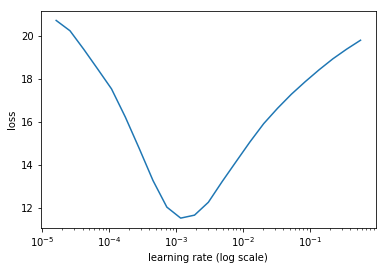

In [179]:
m.sched.plot(1)

In [180]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [181]:
m.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                 
    0      2.225566   0.543632   5.677505  
    1      0.965291   0.195325   1.430209                   
    2      0.517597   0.123172   0.457172                   



[0.123172, 0.4571724260349043]

In [182]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                  
    0      0.144988   0.205925   0.683482  
    1      0.129772   0.143836   2.714472                   
    2      0.10111    0.14105    3.0668                     
    3      0.081152   0.127381   2.606847                    
    4      0.067812   0.123558   2.597837                    



[0.12355832, 2.5978366652509255]

In [183]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                   
    0      0.134182   0.145888   1.692352  
    1      0.102641   0.10149    0.336669                   
    2      0.074667   0.095796   0.361637                    
    3      0.059923   0.09377    0.338031                    
    4      0.052602   0.135636   3.005414                    
    5      0.050698   0.132969   3.703926                    
    6      0.043457   0.113831   3.055633                    
    7      0.0351     0.113352   3.042856                    



[0.1133519, 3.0428555599751457]

In [184]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [185]:
m.fit(lr, 1, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                 
    0      2.580072   0.679866   8.690747  



[0.679866, 8.690747181210194]

In [186]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                  
    0      0.437602   0.25304    8.085164  
    1      0.239983   0.126114   1.607639                   
    2      0.153575   0.120294   2.624216                   



[0.120293915, 2.624216429324983]

In [188]:
m.save('val0')

In [189]:
m.load('val0')